In [141]:
import os
import pandas
import csv
import numpy
import numpy as np
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import tools
import seaborn as sns

df = pandas.read_csv("D:/Code/que-faire-a-paris-.csv", sep= ';', header = 0)
df_propre = df.copy()

df_propre.isnull().values.any()

#gerer les valeurs vides
df_propre.dropna(how= 'all', inplace= True)

#supprimer ce qui n'est pas dans Paris
indexVille = df_propre[ df_propre["address_city"] != "Paris" ].index
df_propre.drop(indexVille, inplace= True)

#df_propre.drop(columns = ["url",  ],  inplace = True)
df_propre.drop(df_propre.columns.difference(['id', 'title', 'date_start', 'date_end', 'tags', 'address_name', 'address_street', 'address_zipcode', 'lat_lon', 'price_type']), axis=1, inplace=True)

print(df_propre.isnull().values.any())

print(df_propre)


True
         id                                              title  \
1     15296                                  SOIRÉE DE CLÔTURE   
3     16667  Le 14 février, fêtez la St Valentin avec vos a...   
4     22401     La Jam du Lundi animée par François Constantin   
5     23325   Salomé / Elektra, Asmik Grigorian / Mikko Franck   
6     23722                           Week-end Howard Shore #2   
...     ...                                                ...   
2118  34437  Atelier de sérigraphie sur taoru (serviette tr...   
2119  16979                Requiem de Mozart & Boléro de Ravel   
2120  34423  Parranda La Cruz + Mazalada en concert à FGO-B...   
2121  34392  Le quốc-ngữ. L'écriture romanisée, vecteur d'u...   
2122  34459               Pour sortir au jour - Olivier Dubois   

                     date_start                   date_end  \
1                           NaN                        NaN   
3                           NaN                        NaN   
4     2023-05-02

In [142]:
print(df_propre.info)
print(df.shape)

<bound method DataFrame.info of          id                                              title  \
1     15296                                  SOIRÉE DE CLÔTURE   
3     16667  Le 14 février, fêtez la St Valentin avec vos a...   
4     22401     La Jam du Lundi animée par François Constantin   
5     23325   Salomé / Elektra, Asmik Grigorian / Mikko Franck   
6     23722                           Week-end Howard Shore #2   
...     ...                                                ...   
2118  34437  Atelier de sérigraphie sur taoru (serviette tr...   
2119  16979                Requiem de Mozart & Boléro de Ravel   
2120  34423  Parranda La Cruz + Mazalada en concert à FGO-B...   
2121  34392  Le quốc-ngữ. L'écriture romanisée, vecteur d'u...   
2122  34459               Pour sortir au jour - Olivier Dubois   

                     date_start                   date_end  \
1                           NaN                        NaN   
3                           NaN                    

In [156]:
arrondissement = [75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020]

df_price_rip = df_propre["price_type"]
df_arr = df_propre["address_zipcode"]

df_price = df_price_rip.replace("gratuit sous condition", "gratuit")
print(df_price.value_counts())

df_arrondissement = pandas.concat([df_price, df_arr], axis = 1)

#df_arrondissement = df_arrondissement.reset_index()

print(df_arrondissement.value_counts())



gratuit    1111
payant      823
Name: price_type, dtype: int64
price_type  address_zipcode
gratuit     75012              150
            75013              104
            75020               88
            75015               87
payant      75011               81
gratuit     75018               81
payant      75001               77
            75019               76
gratuit     75010               74
            75014               73
payant      75016               71
            75012               70
gratuit     75019               69
            75005               65
payant      75010               62
gratuit     75001               60
            75004               54
payant      75018               53
            75013               51
gratuit     75009               42
payant      75014               37
            75020               37
            75003               36
            75006               32
            75015               29
gratuit     75011               27

price_type  address_zipcode
gratuit     75012              150
            75013              104
            75020               88
            75015               87
            75018               81
payant      75011               81
            75001               77
            75019               76
gratuit     75010               74
            75014               73
payant      75016               71
            75012               70
gratuit     75019               69
            75005               65
payant      75010               62
gratuit     75001               60
            75004               54
payant      75018               53
            75013               51
gratuit     75009               42
payant      75020               37
            75014               37
            75003               36
            75006               32
            75015               29
gratuit     75011               27
            75006               27
            75007          

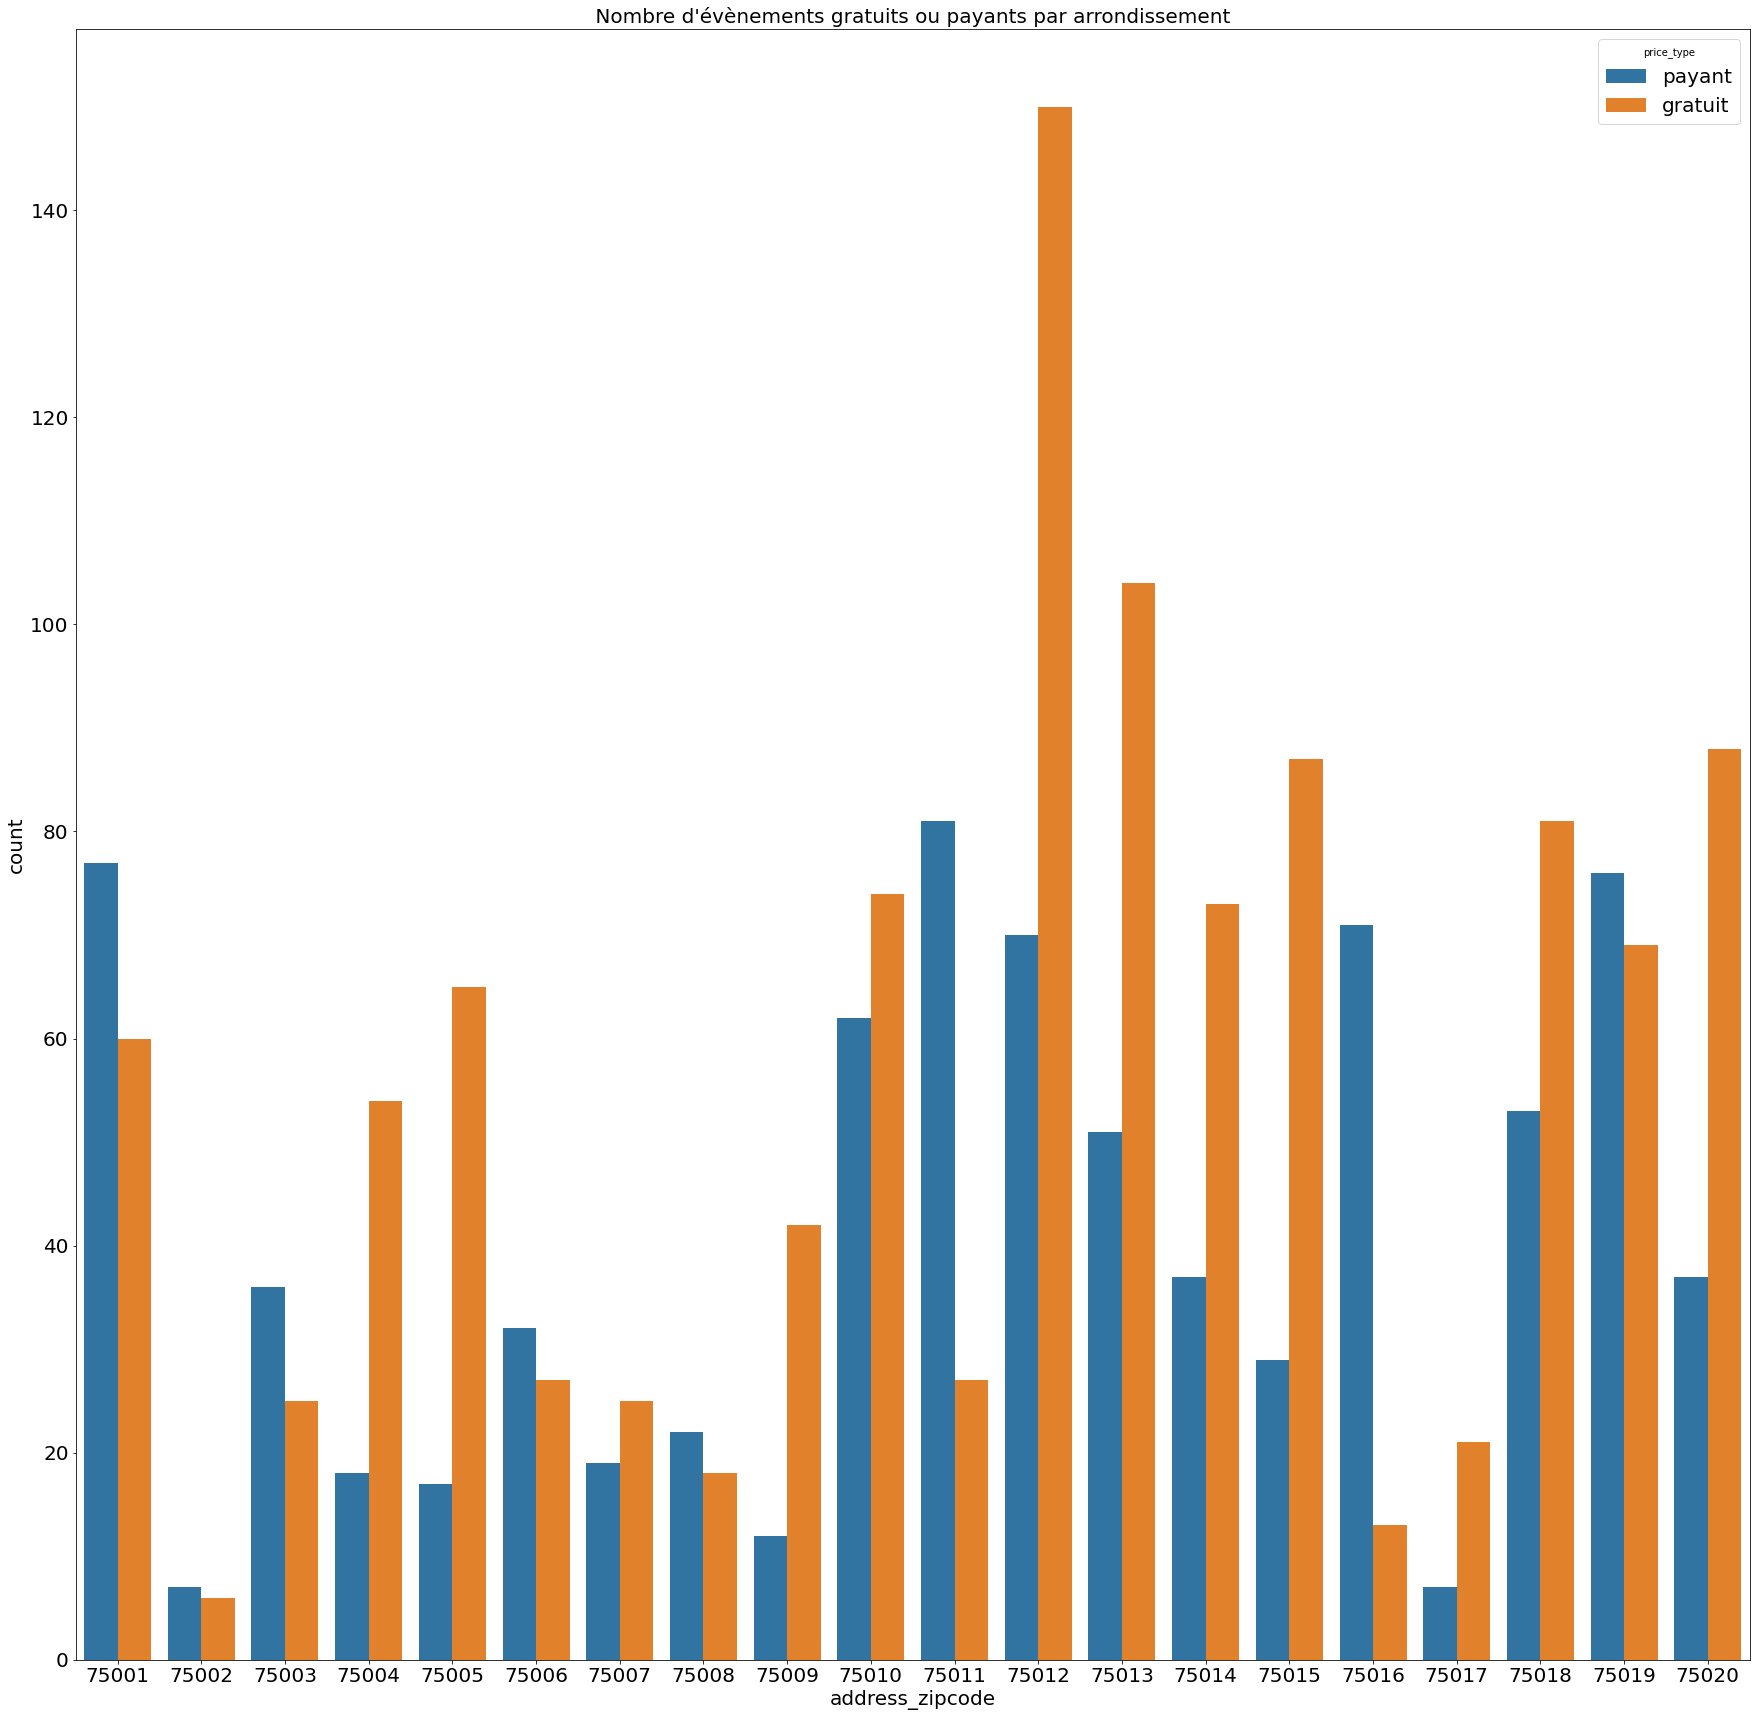

In [157]:
#df_arrondissement.hist(column= "address_zipcode", by = "price_type")
# plt.show()

#sns.countplot(x = "address_zipcode", hue ="price_type", data = df_arrondissement)
threshold = 10
zip_counts = df_arrondissement ["address_zipcode"].value_counts()
valid_zips = zip_counts[zip_counts >= threshold].index
df_valid = df_arrondissement[df_arrondissement["address_zipcode"].isin(valid_zips)]
print(df_valid.value_counts())


mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 20
plt.figure(figsize=(30,30))

fig = sns.countplot(x="address_zipcode", hue="price_type", data = df_valid, order = ["75001", "75002", "75003", "75004", "75005", "75006", "75007", "75008", "75009", "75010", "75011", "75012", "75013", "75014", "75015", "75016", "75017", "75018", "75019", "75020"])
#fig.set(title = " Nombre d'évènements gratuits ou payants pas arrondissement ")
plt.title(" Nombre d'évènements gratuits ou payants par arrondissement ", fontsize = 20)
plt.show()